# Network construction & Community detection--Twitter data

### We are given the data from tweeter, recording users' ID and the time and location when they post anything. Our basic idea is to construct a network where we observe the relation among places by analyzing people's activities near each location, trying to detect grouping communities and distinguish weak links from strong ones.

## Step 1,  load the necessary data from our own module *CommDetect* with weekdays/weekend categories

In [1]:
%pwd

u'/Users/CQ/Documents/Project1'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from combo import combo
from CommDetect import CommDetect as CD
%pylab inline

PWD = '/Users/CQ/Documents/Project1'

Failed `CDLL(/Library/Frameworks/GEOS.framework/Versions/Current/GEOS)`


Populating the interactive namespace from numpy and matplotlib


## Step 2, construct a network with the probability, or equivalently, the weight of link(a,b) defined as
### $$link(a,b) = \Sigma_c\frac{t(c,a) \cdot (t(c,b)-\delta(a,b))}{T \cdot (t(c)-1)}$$
### where
* *t(c,a)* denotes the total number of tweets that user *c* has posted at location (in our case, zipcode) *a*
* $t(c) = \Sigma_a t(c,a)$
* $T = \Sigma_c t(c)$

### We store our naive networks in **Net1** while **Net2** is for probabilistic networks, same notion behind **Graph1** and **Graph2**

In [2]:
Net1, Net2 = range(4), range(4)
Graph, Graph1, Graph2 = range(4), range(4), range(4)
LABEL = ['All ','Week','Satur','Sun']

### The following graphs are not necessary for map plotting--we have partition dictionary for that. These graphs are only used for modularity calculation.

In [3]:
for i in range(4):
    Net1[i] = pd.read_csv(PWD + '/Network1/Network of '+LABEL[i]+'days.csv').iloc[:,1:]
    Net2[i] = pd.read_csv(PWD + '/Network2/Network2 of '+LABEL[i]+'days.csv').iloc[:,1:]
    Graph[i] = CD.Graph_build(Net1,i,False)
    Graph1[i] = CD.make_directed_and_weighted(Graph[i])
    Graph2[i] = CD.Graph_build(Net2,i,True)

## Step 3, proceed to community detection

In [4]:
N_CP4, P_CP4 = range(4), range(4)
for i in range(4):
    N_CP4[i] = pd.read_csv(PWD + '/Network1/[Naive]ComboPart of '+LABEL[i]+'days.csv')
    P_CP4[i] = pd.read_csv(PWD + '/Network2/[Probabilistic]ComboPart of '+LABEL[i]+'days.csv')
    N_CP4[i] = dict(zip(N_CP4[i].ZipCode, N_CP4[i].Part))
    P_CP4[i] = dict(zip(P_CP4[i].ZipCode, P_CP4[i].Part))

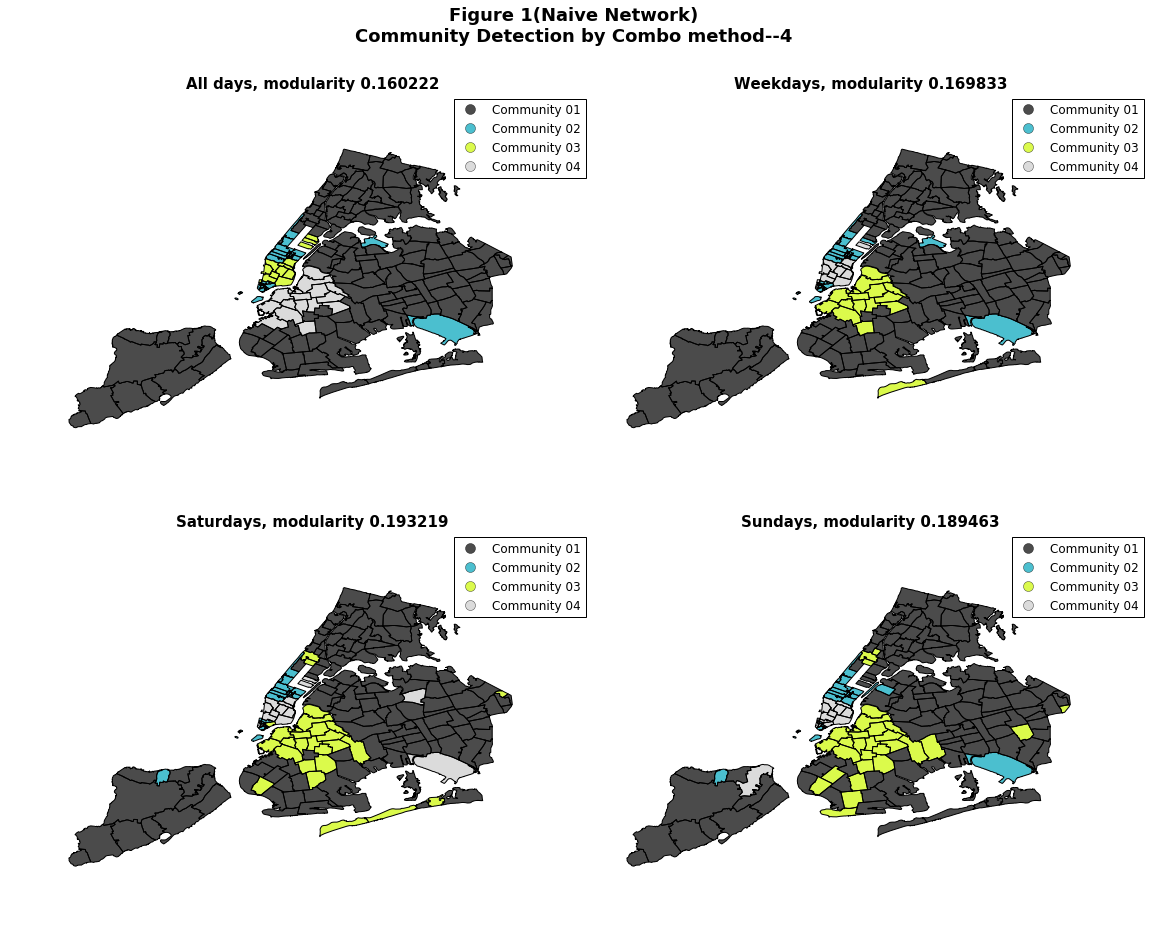

In [5]:
fig1 = plt.figure(num = 1, figsize = (20,15))
plt.suptitle('Figure 1(Naive Network)\nCommunity Detection by Combo method--4', fontweight="bold", size=18)
for i in range(4):
    CD.PlotMapPart(fig1, N_CP4[i], date_index=i, title = LABEL[i]+'days, modularity %f' %combo.modularity(Graph1[i],N_CP4[i]))

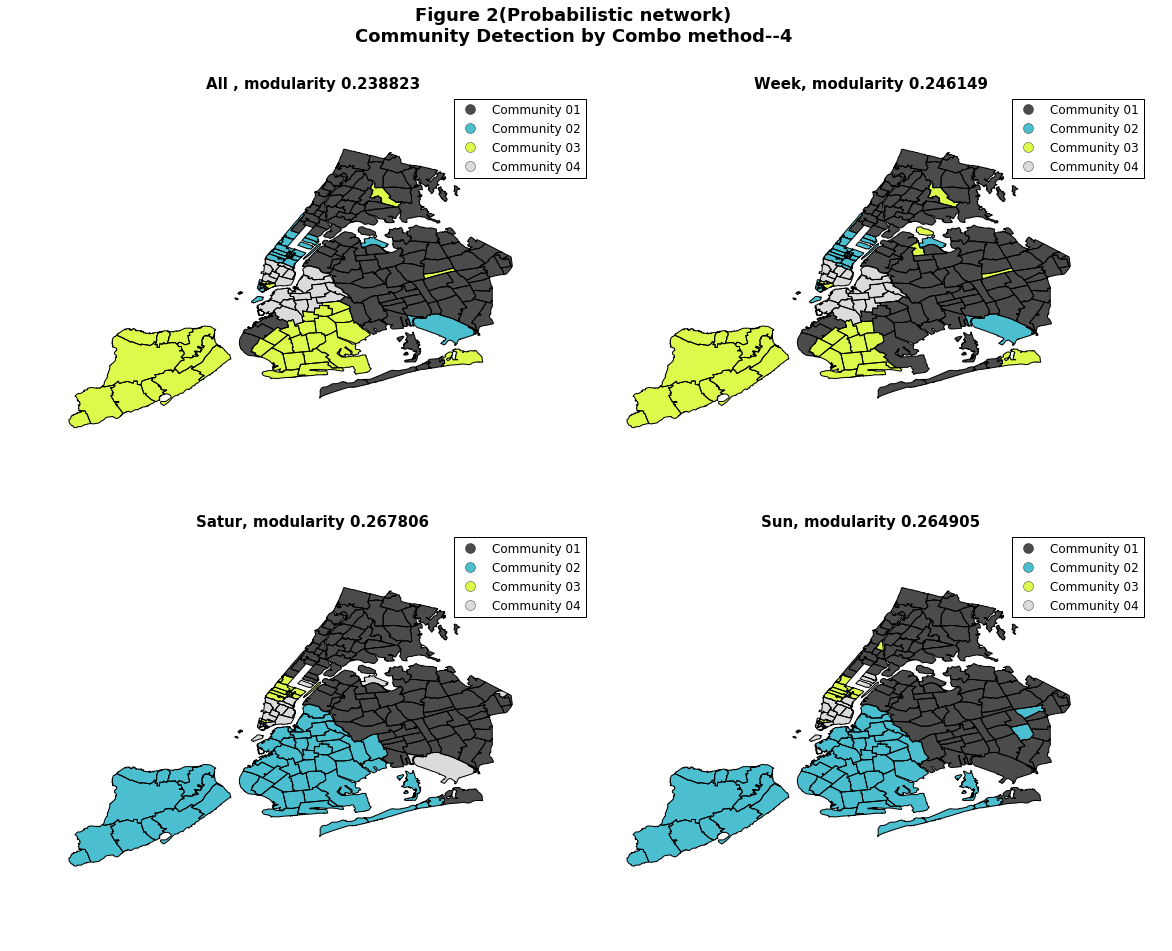

In [6]:
fig2 = plt.figure(num = 2, figsize = (20,15))
plt.suptitle('Figure 2(Probabilistic network)\nCommunity Detection by Combo method--4', fontweight="bold", size=18)
for i in range(4):
    CD.PlotMapPart(fig2, P_CP4[i], date_index=i, title = LABEL[i]+', modularity %f' %combo.modularity(Graph2[i],P_CP4[i]))

## Step 4, some data visualization and demonstration

### A) First glance, twitter users' daily activities, with weekends highlighted. This confirms that we do miss some data here as many days having "zero" activity which is clearly against common sense.

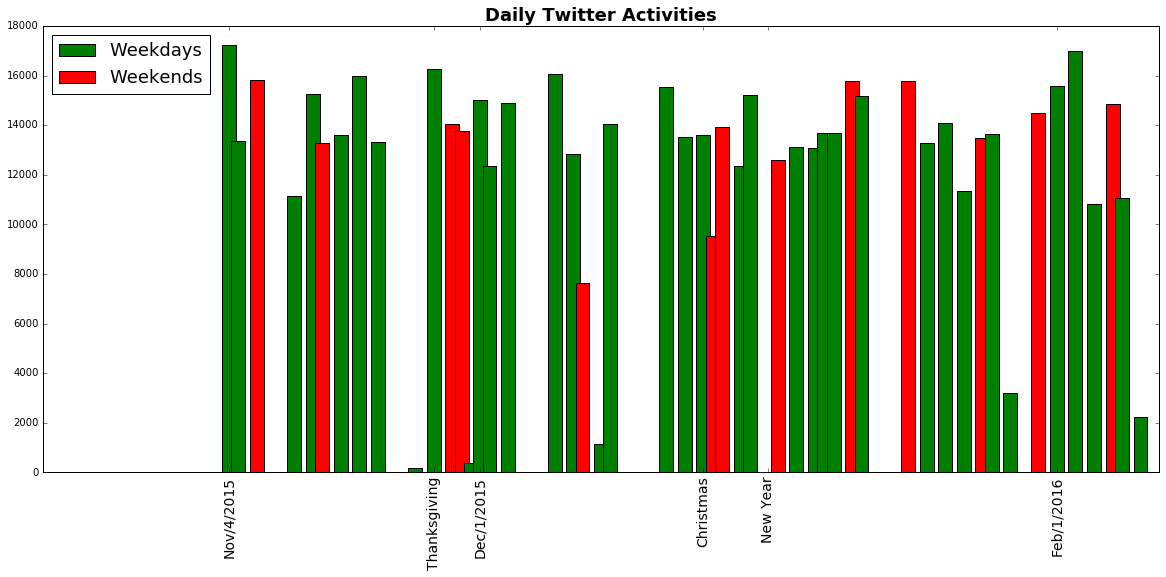

In [8]:
CD.DailyActivity()

### B) Top places (zip codes) with highest amount of tweets, marked in map

In [7]:
PR1, PR2, UGraph1_PR, UGraph2_PR = range(4), range(4), range(4), range(4)
for i in range(4):
    PR2[i] = CD.as_undirected(Graph2[i])
    UGraph1_PR[i] = list(nx.connected_component_subgraphs(Graph[i], copy=True))[0]
    PR1[i] = nx.pagerank(UGraph1_PR[i],0.85)
    UGraph2_PR[i] = list(nx.connected_component_subgraphs(PR2[i], copy=True))[0]
    PR2[i] = nx.pagerank(UGraph2_PR[i],0.85)

/Users/CQ/anaconda/lib/python2.7/site-packages/networkx-1.9.1-py2.7.egg/networkx/generators/stochastic.py:41: UserWarning: zero out-degree for node 11005.0
  warnings.warn('zero out-degree for node %s'%u)
/Users/CQ/anaconda/lib/python2.7/site-packages/networkx-1.9.1-py2.7.egg/networkx/generators/stochastic.py:41: UserWarning: zero out-degree for node 11001.0
  warnings.warn('zero out-degree for node %s'%u)


### You can either change the number of "Top" directly or change TopPercent instead

In [8]:
TopPercent = 10
Top = len(CD.PLACES) * TopPercent / 100
Top

23

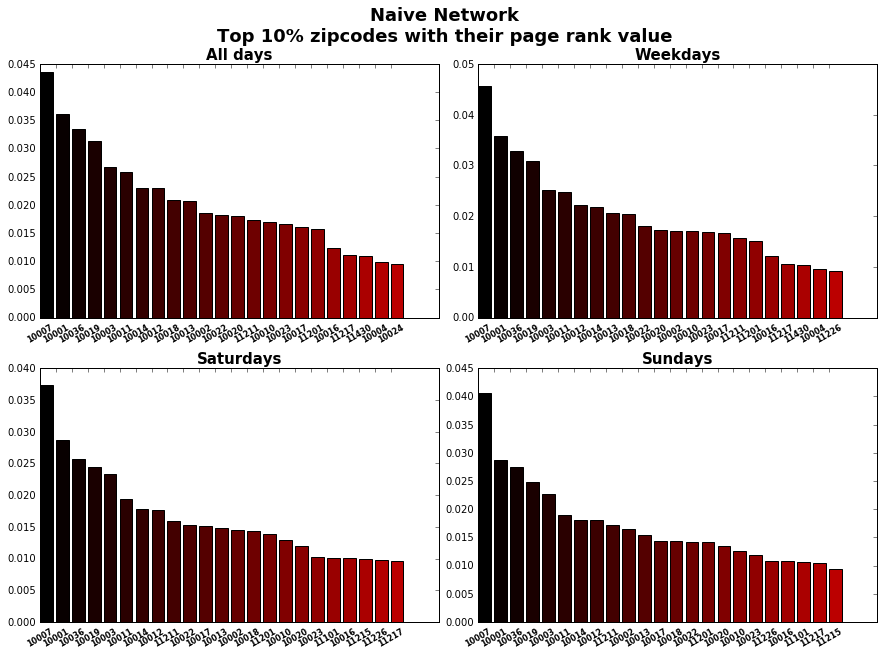

In [9]:
TopZipNaive, TopZipProb = range(4), range(4)
fig4 = plt.figure(num = 4, figsize = (15,10))
Color = matplotlib.cm.gist_heat(linspace(0,1,Top*2))
plt.suptitle('Naive Network\nTop %d%% zipcodes with their page rank value'%TopPercent, fontweight="bold", size=18)
for i in range(4):
    TopZipNaive[i] = CD.TopZipCode(fig4, PR1[i], i, Color, Top)

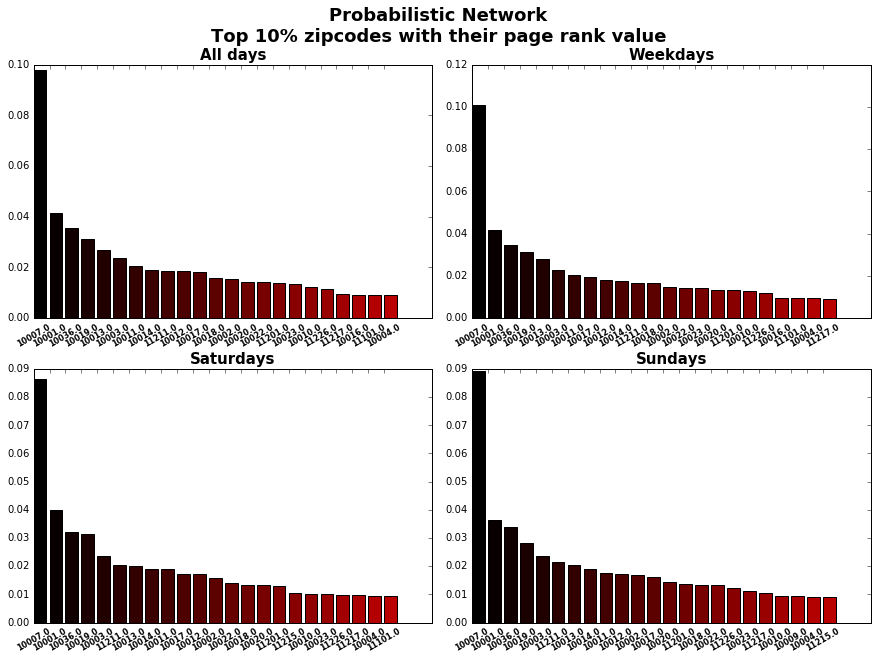

In [10]:
fig5 = plt.figure(num = 5, figsize = (15,10))
plt.suptitle('Probabilistic Network\nTop %d%% zipcodes with their page rank value'%TopPercent, fontweight="bold", size=18)
for i in range(4):
    TopZipProb[i] = CD.TopZipCode(fig5, PR2[i], i, Color, Top)

## Next we try page rank algorithm to see if it can provide anything interesting, we will compare our probabilistic network with naive networks

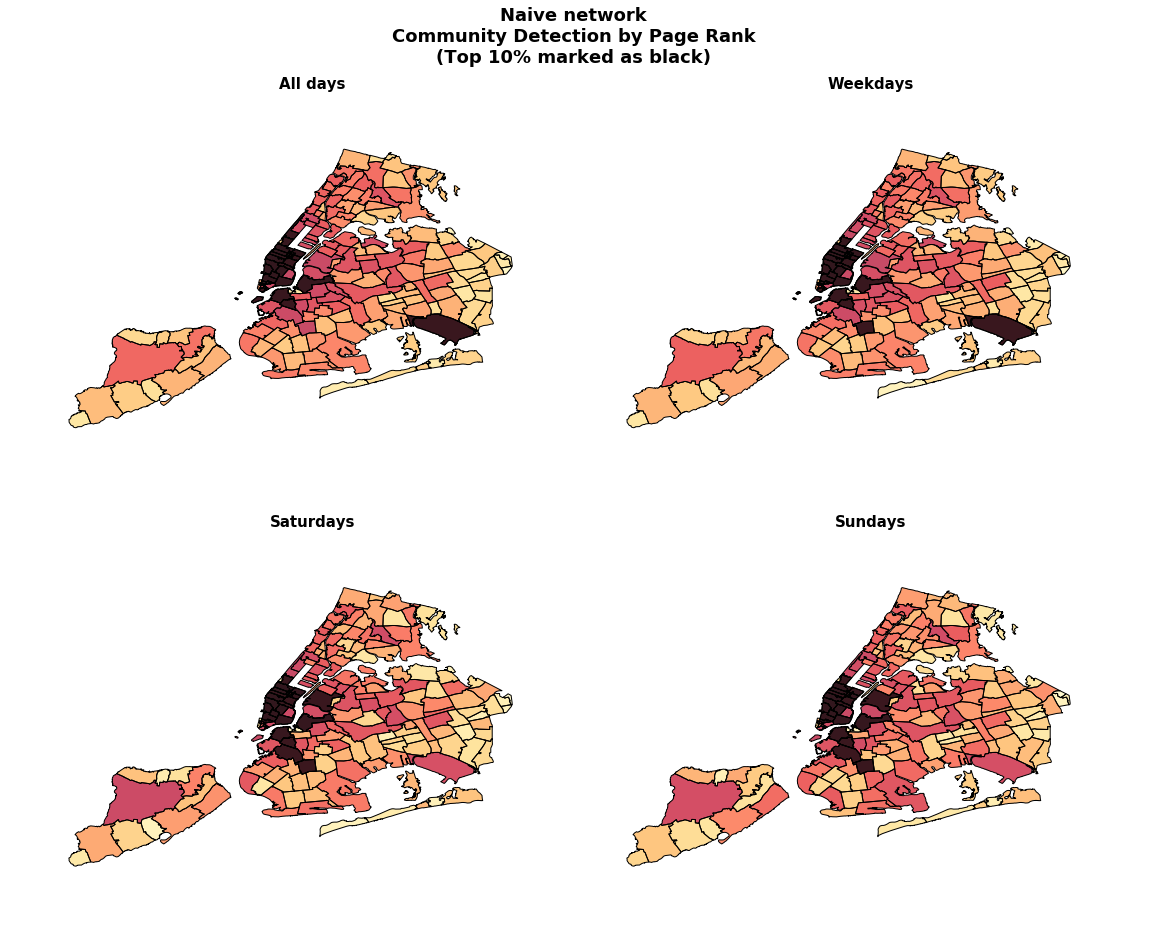

In [11]:
fig6 = plt.figure(num = 6, figsize = (20,15))
plt.suptitle('Naive network\nCommunity Detection by Page Rank\n(Top %d%% marked as black)'%TopPercent, fontweight="bold", size=18)
for i in range(4):
    CD.PlotPageRankPart(fig6, PR1[i], TopZipNaive, date_index=i, title = LABEL[i]+'days')

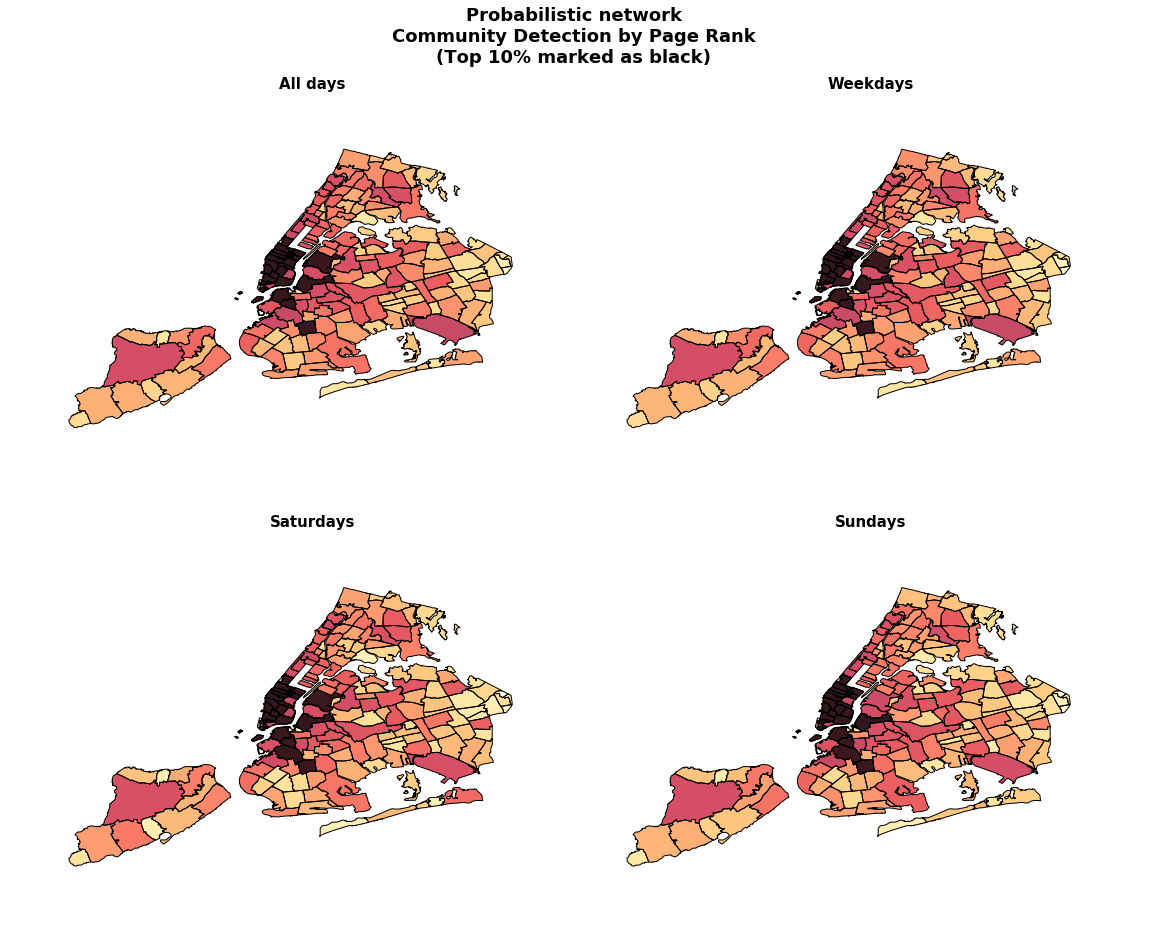

In [12]:
fig7 = plt.figure(num = 7, figsize = (20,15))
plt.suptitle('Probabilistic network\nCommunity Detection by Page Rank\n(Top %d%% marked as black)'%TopPercent, fontweight="bold", size=18)
for i in range(4):
    CD.PlotPageRankPart(fig7, PR2[i], TopZipProb, date_index=i, title = LABEL[i]+'days')

### C) Some demographic data of New York gathered in 2014

In [5]:
Demographic = pd.read_csv(PWD + "/Demographic_2014.csv", low_memory=False)
variable_names = list(Demographic.iloc[0,:])
Demographic = Demographic.iloc[1:,:]
Demographic.index = range(len(Demographic))
zipcode = pd.DataFrame([int(Demographic.loc[i,'Name of Area'].split(" ")[0]) for i in range(len(Demographic))])
Demographic.columns = variable_names
Demographic = pd.concat((zipcode,Demographic),axis=1)
Demographic = Demographic.rename(columns={0:'zipcode'})

### Slice and simplify the dataframe according to our zipcode database so we can focus on New York instead of the whole country

In [6]:
Demo_NY = Demographic[Demographic.zipcode.isin(CD.PLACES)]

### Since the demographic data provides only number regarding population, and the area of each territory plays a more crucial role here, comparing populatin doesn't make much sense. Instead, we normalize it by dividing the population, and then compare the percentage.
### The formulae for such weighted average are:
$$mean=\frac{\sum_z [p(z) \cdot pop(z)]}{\sum_z pop(z)}$$
$$std=\sqrt{\frac{\sum_z [(p(z)-mean)^2 \cdot pop(z)]}{\sum_z pop(z)}}$$
### where p(z), pop(z) denote the percentage and population, respectively

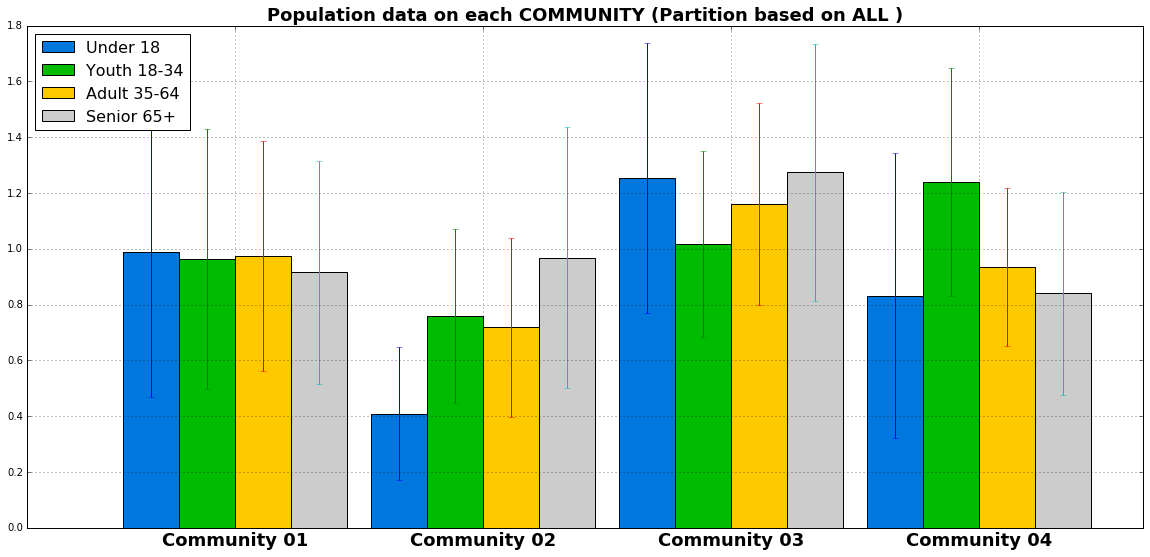

In [7]:
CD.HighlightFeatures(Demo_NY, CD.population, P_CP4, CD.legend_pop,'Population')

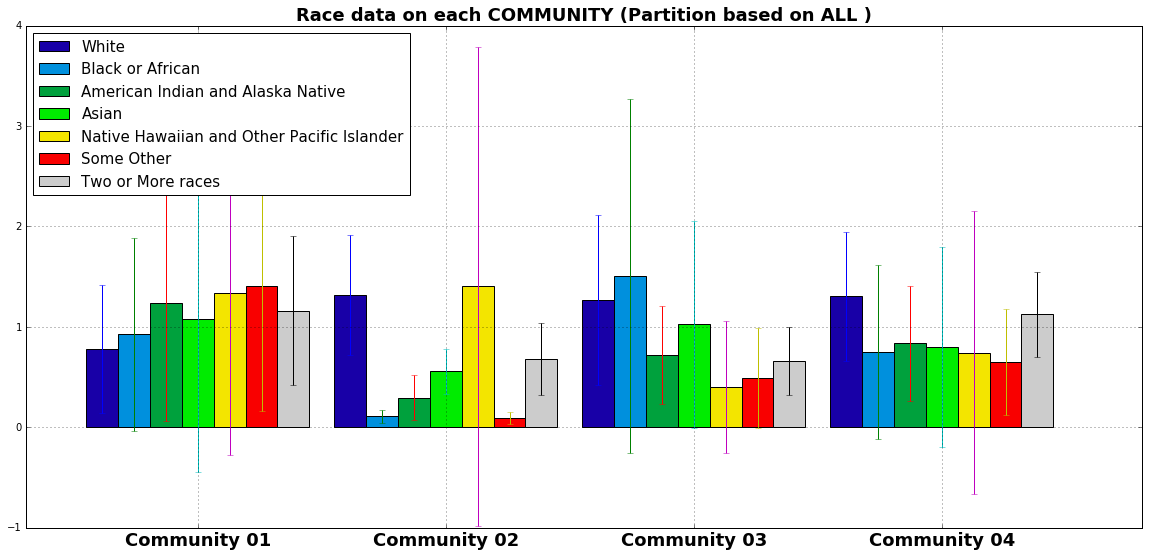

In [8]:
CD.HighlightFeatures(Demo_NY, CD.race, P_CP4, CD.legend_race,'Race')

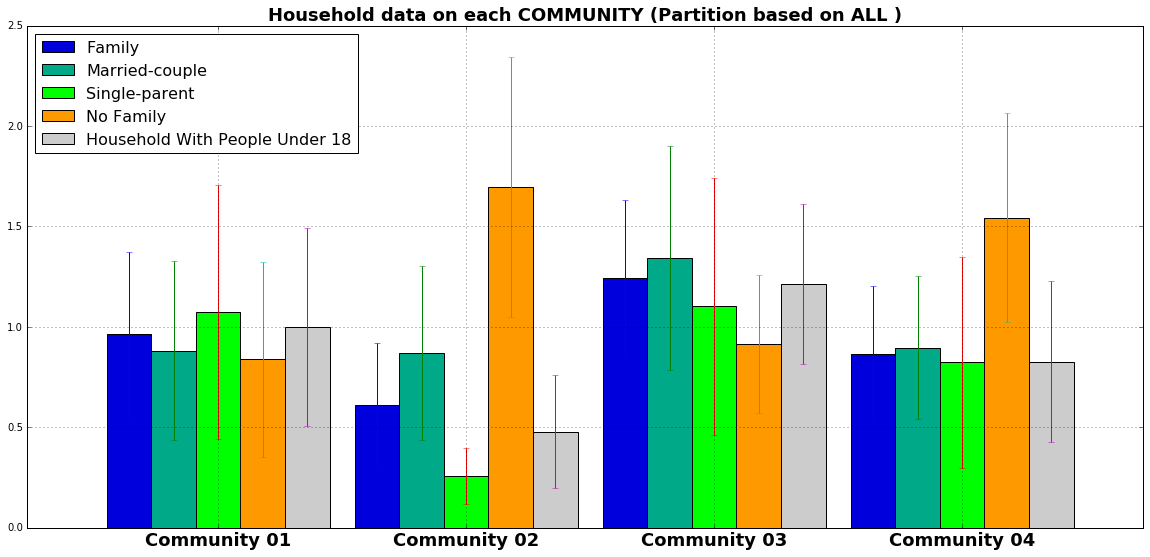

In [9]:
CD.HighlightFeatures(Demo_NY, CD.households, P_CP4, CD.legend_households,'Household')

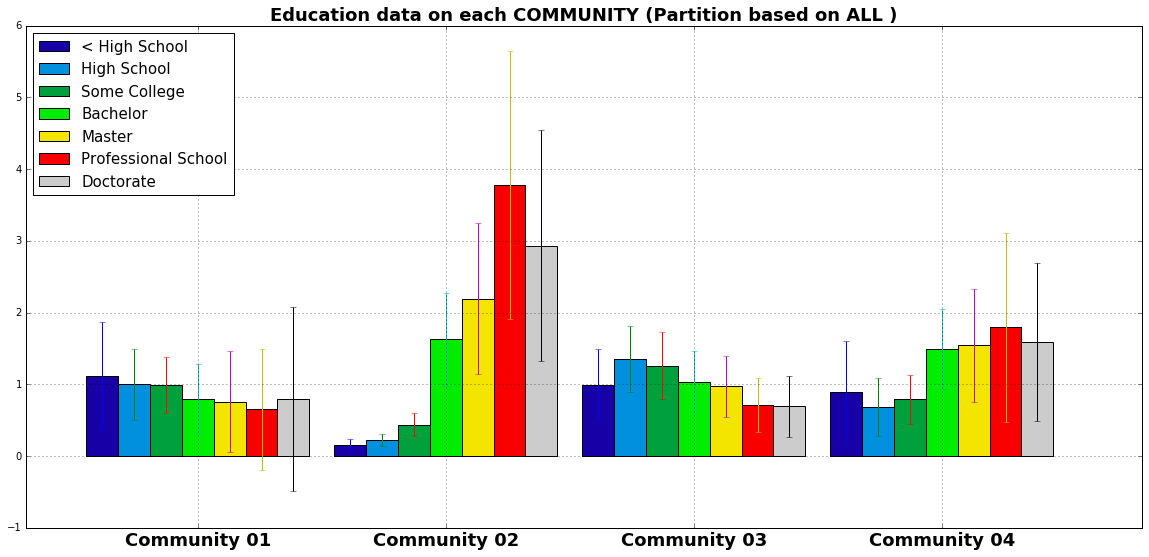

In [10]:
CD.HighlightFeatures(Demo_NY, CD.education, P_CP4, CD.legend_edu,'Education')

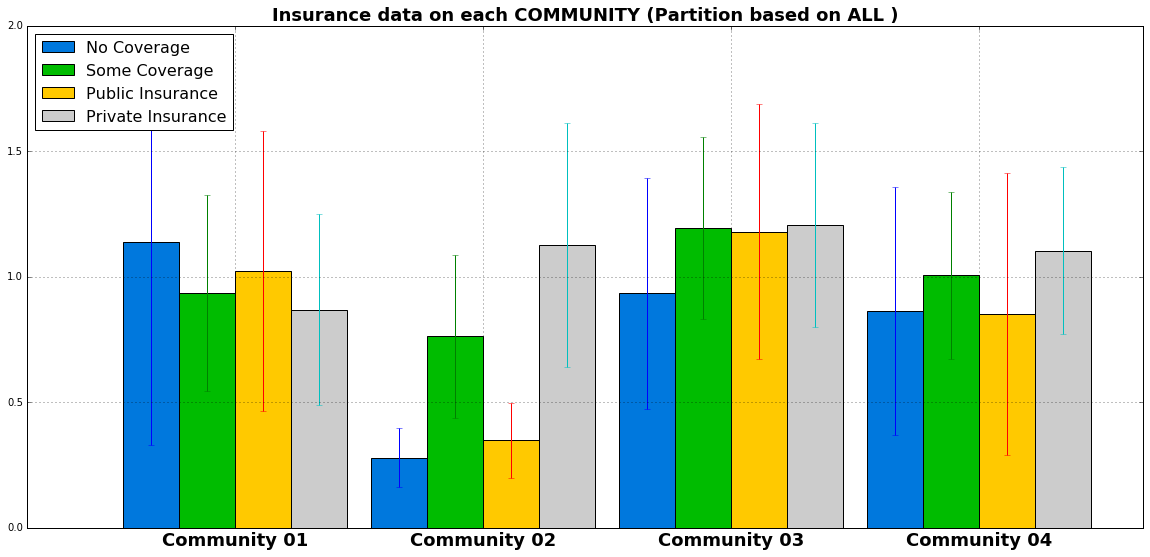

In [11]:
CD.HighlightFeatures(Demo_NY, CD.insurance, P_CP4, CD.legend_insur,'Insurance')

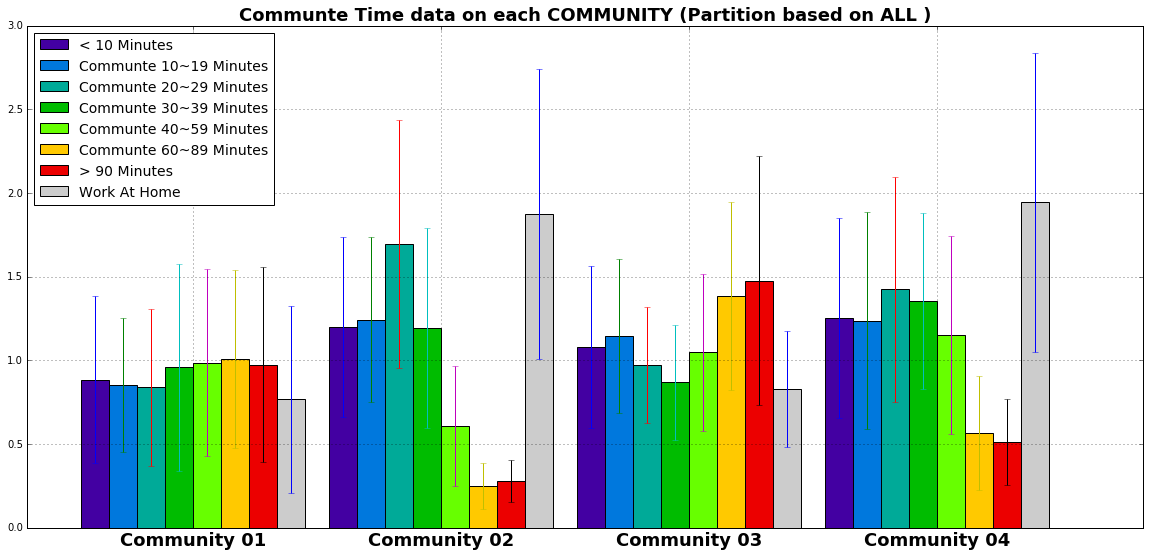

In [12]:
CD.HighlightFeatures(Demo_NY, CD.commute_time, P_CP4, CD.legend_commute_time,'Communte Time')

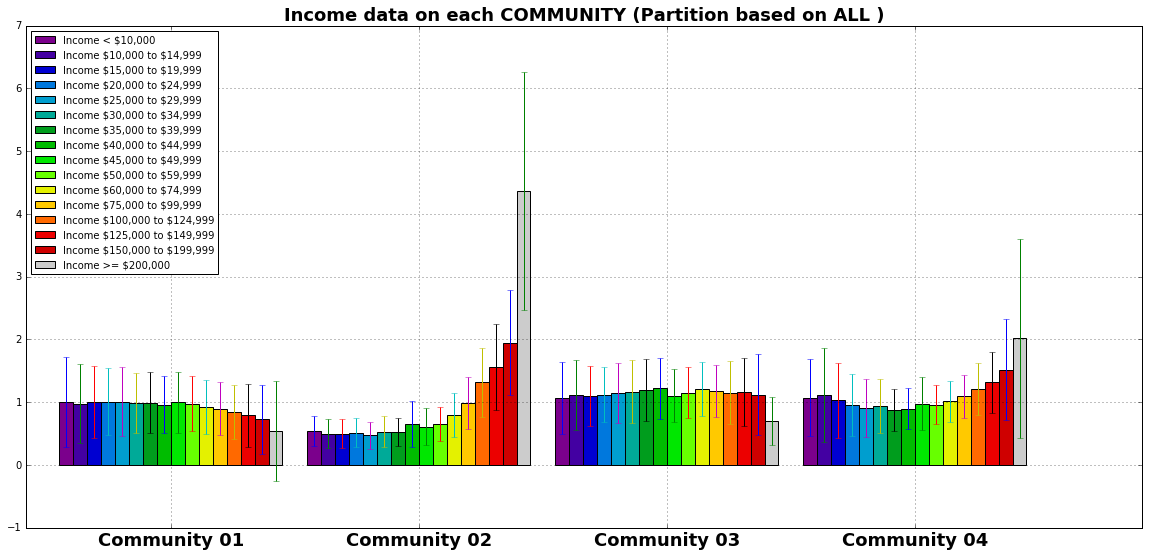

In [13]:
CD.HighlightFeatures(Demo_NY, CD.income, P_CP4, CD.legend_income,'Income')

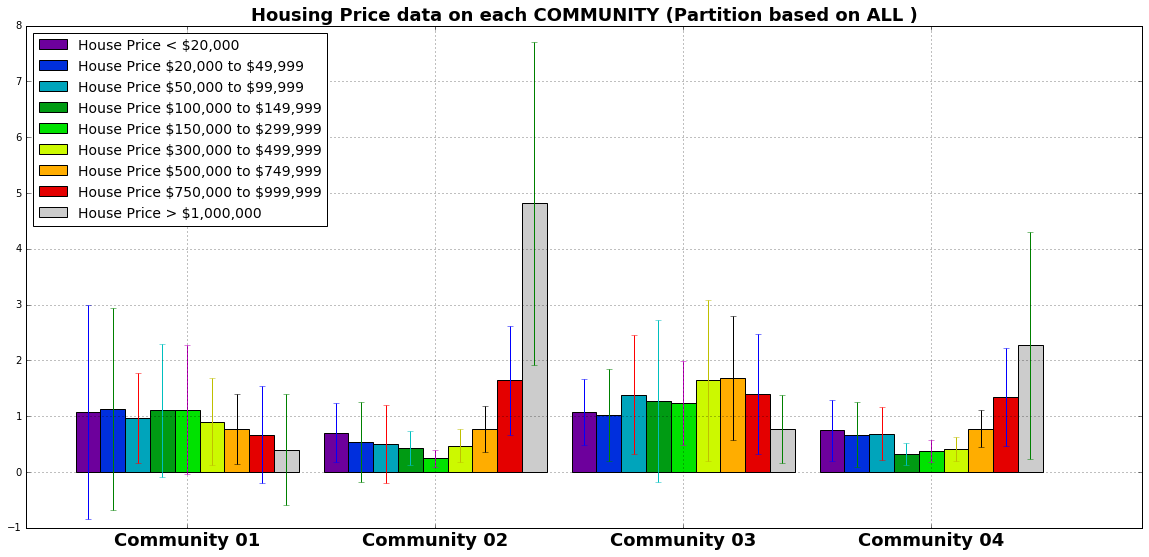

In [15]:
CD.HighlightFeatures(Demo_NY, CD.house_price, P_CP4, CD.legend_house_price,'Housing Price')

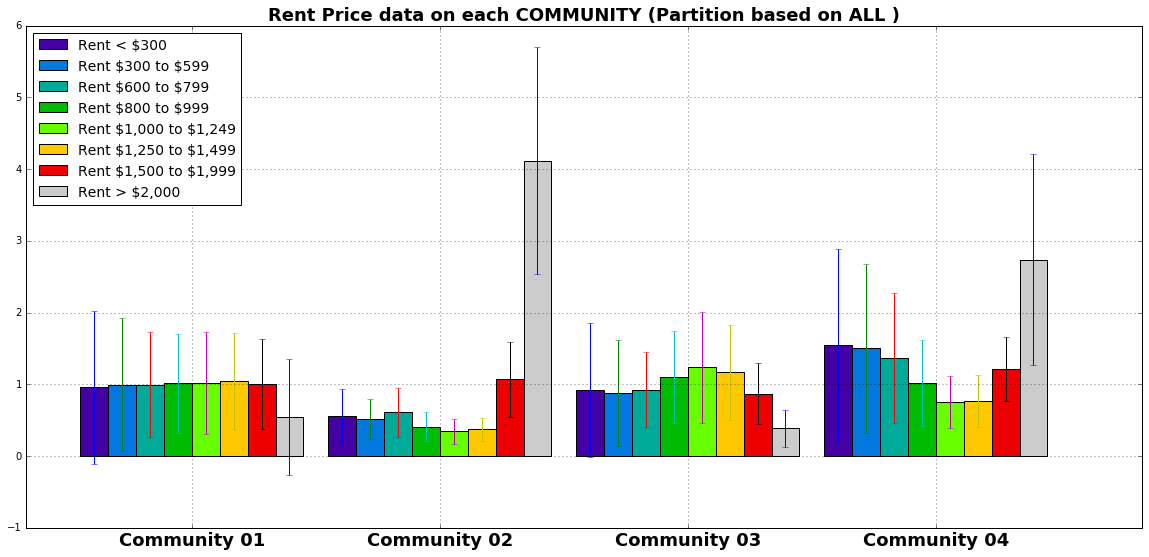

In [17]:
CD.HighlightFeatures(Demo_NY, CD.rent_price, P_CP4, CD.legend_rent_price,'Rent Price')

# Next we highlight some features, for example, the price level and education level among 4 selected commuties

## First we draw the map again, then show features with corespondent color

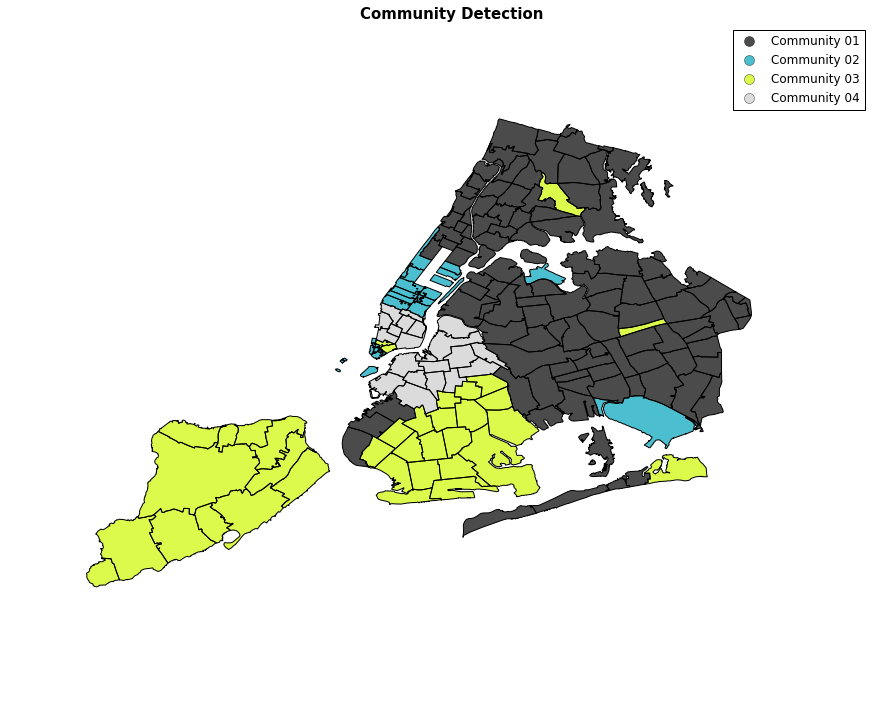

In [18]:
fig8 = plt.figure(num = 8, figsize = (15,12))
CD.PlotMapPart(fig8, P_CP4[0], size = 111, alpha = 0.7, cmap = 'spectral')

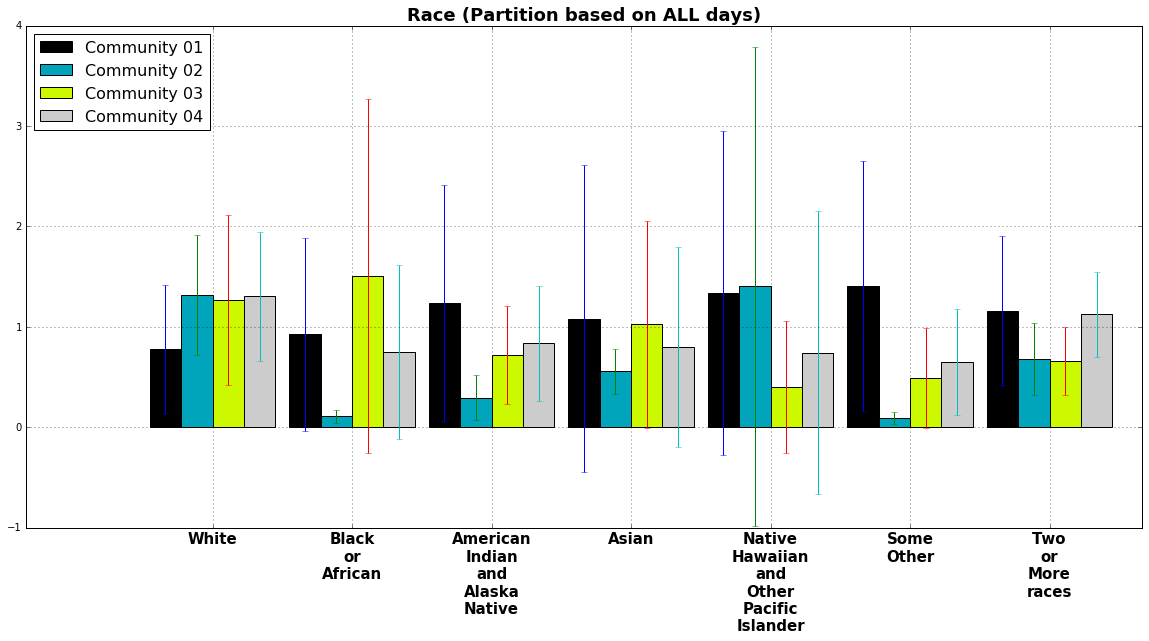

In [8]:
CD.HighlightFeatures(Demo_NY, CD.race, P_CP4, CD.legend_race,'Race', by_feature=1)

#### Manhattan has a lot of labor force and people with no family, with lowest number of single-parent
#### People with children tend to live outside of the city, where Brooklyn and State Island are the most popular places

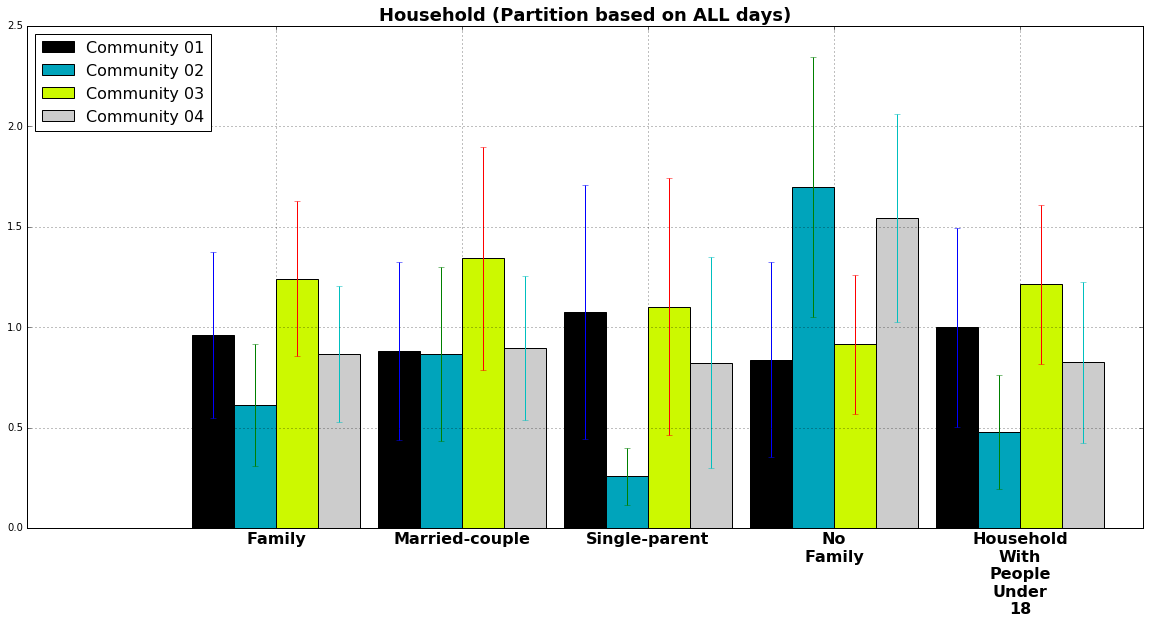

In [9]:
CD.HighlightFeatures(Demo_NY, CD.households, P_CP4, CD.legend_households,'Household', by_feature=1)

### Manhattan has unshakable advantage in higher education

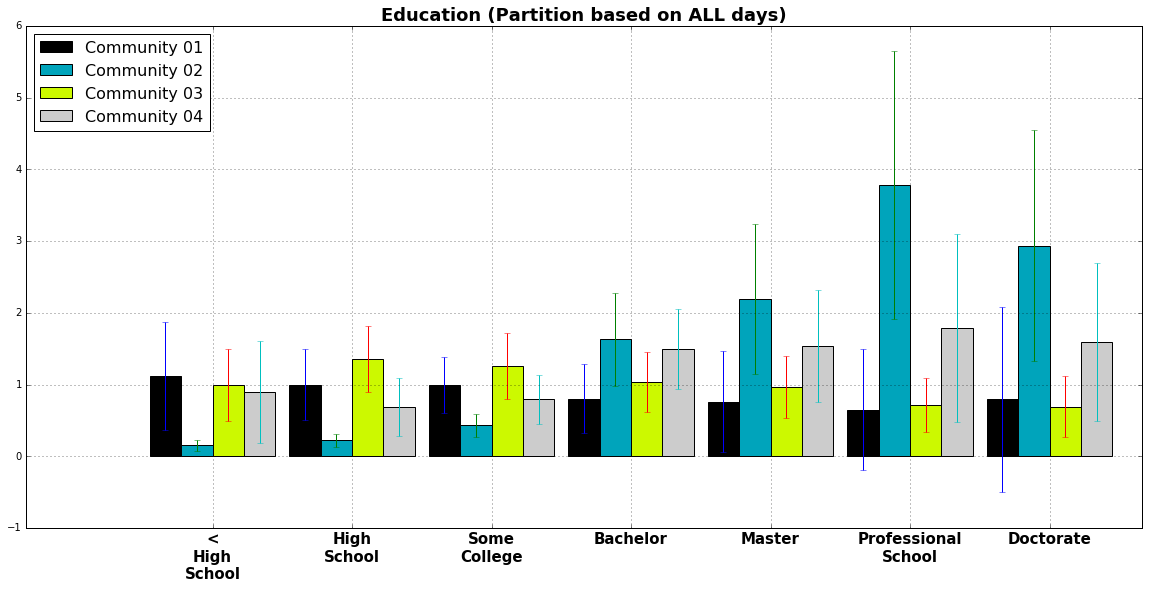

In [10]:
CD.HighlightFeatures(Demo_NY, CD.education, P_CP4, CD.legend_edu,'Education', by_feature=1)

## Next picture tells us two things:
1. Since most working places are located in Manhattan, it's understandable why they have the most people who work at home
2. While many people choose to live outside out the city, they are constantly suffering long time commute (>40 minutes), which, in another way, highlights Manhattan's business-concentration

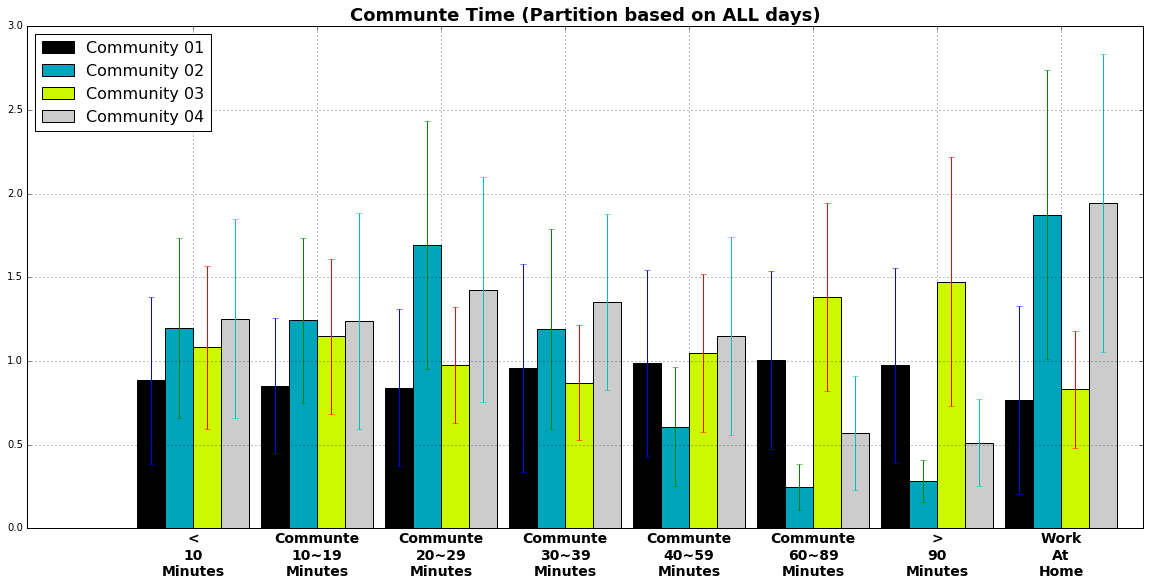

In [11]:
CD.HighlightFeatures(Demo_NY, CD.commute_time, P_CP4, CD.legend_commute_time,'Communte Time', by_feature=1)

## The following pictures showcase Manhattan's price level from three prospectives
## Basically, Bronx and Queens are poorest, while Manhattan being the richest community without a doubt, Staten Island and Brooklyn are just in the middle

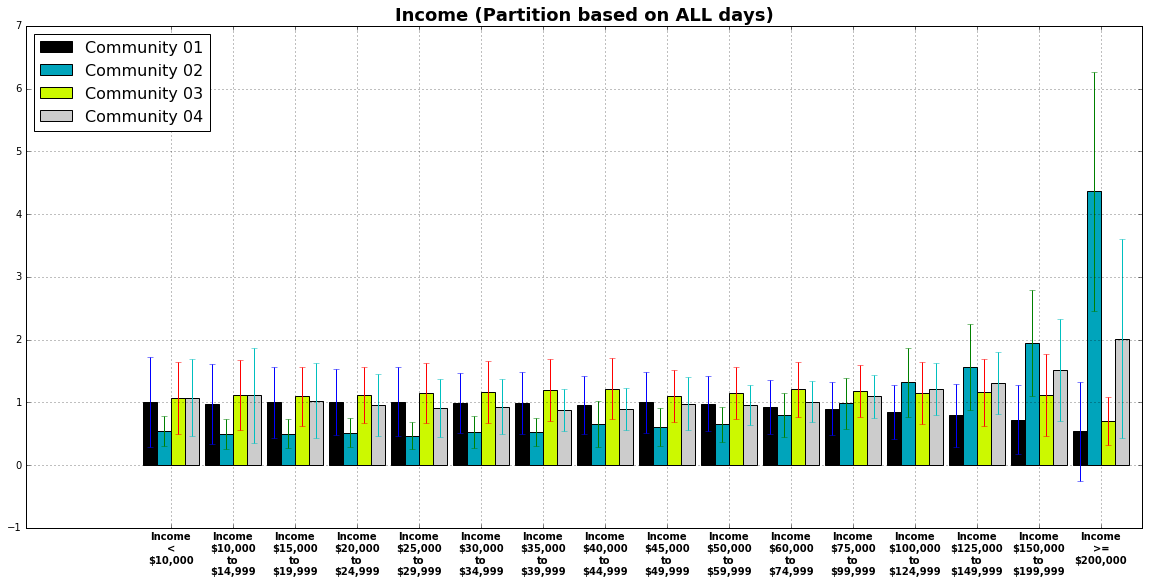

In [12]:
CD.HighlightFeatures(Demo_NY, CD.income, P_CP4, CD.legend_income,'Income', by_feature=1)

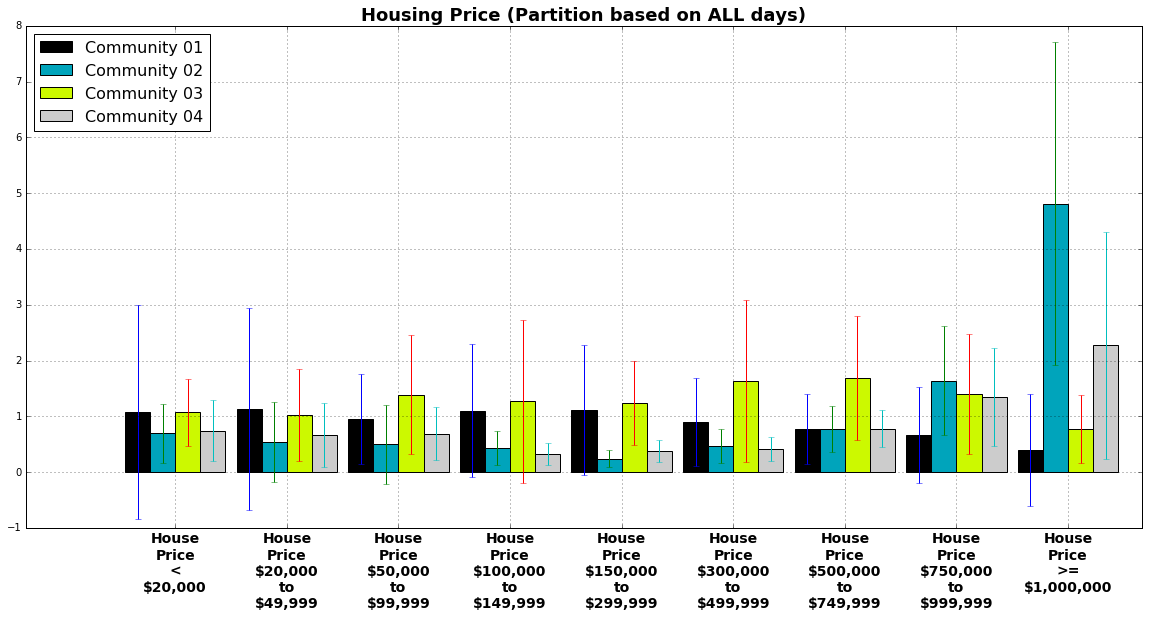

In [13]:
CD.HighlightFeatures(Demo_NY, CD.house_price, P_CP4, CD.legend_house_price,'Housing Price', by_feature=1)

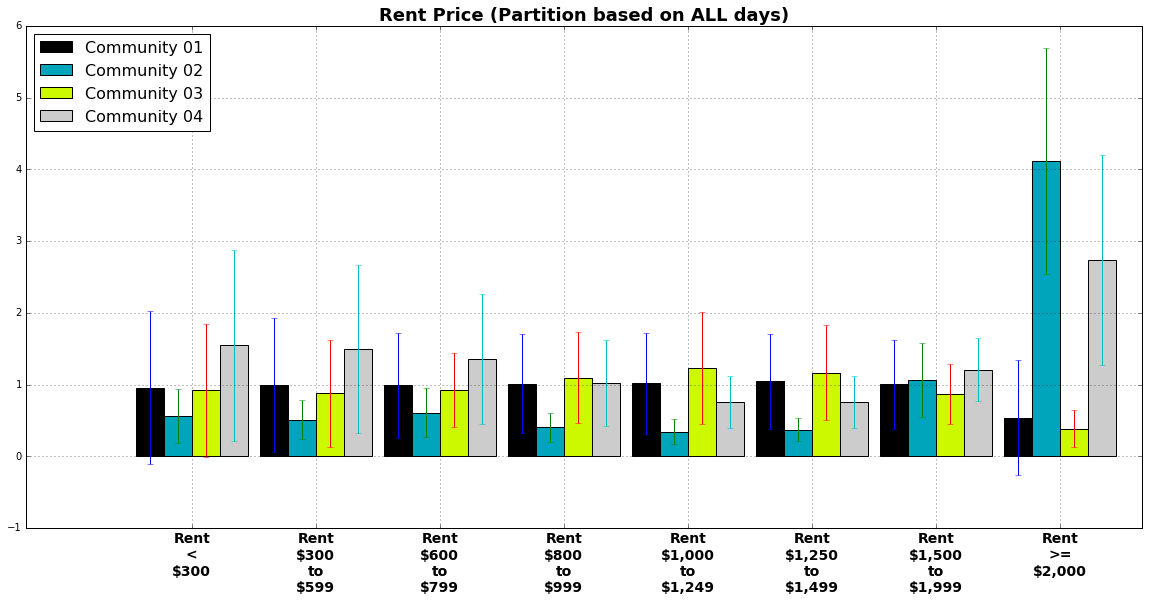

In [14]:
CD.HighlightFeatures(Demo_NY, CD.rent_price, P_CP4, CD.legend_rent_price,'Rent Price', by_feature=1)

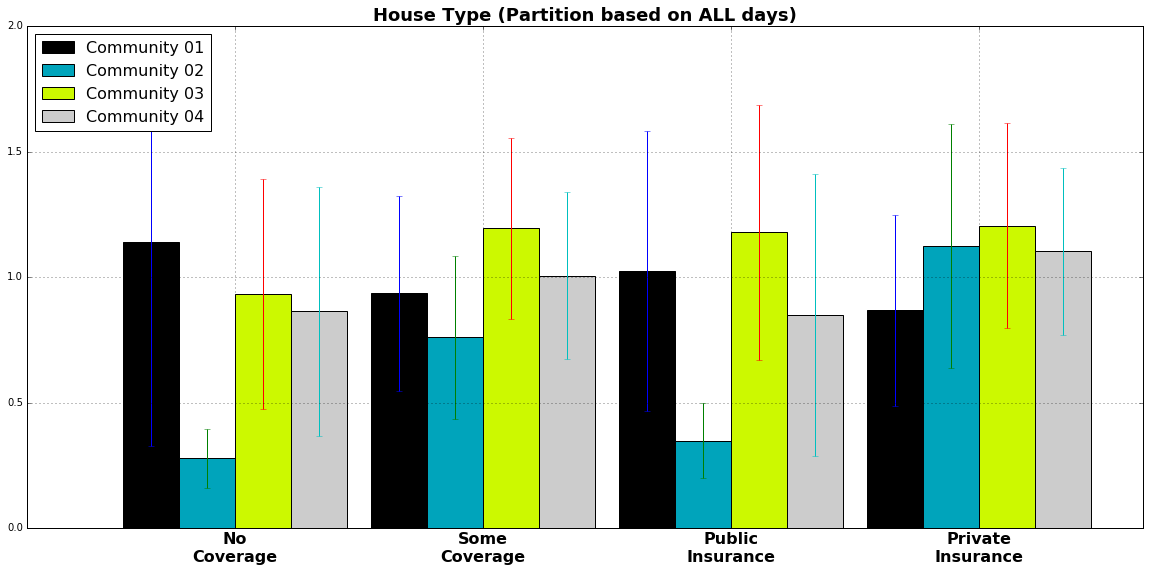

In [15]:
CD.HighlightFeatures(Demo_NY, CD.insurance, P_CP4, CD.legend_insur,'House Type', by_feature=1)

### Next, we know that midtown Manhattan possess a lot of vacant house, not surprising consider its highest rent price/house price

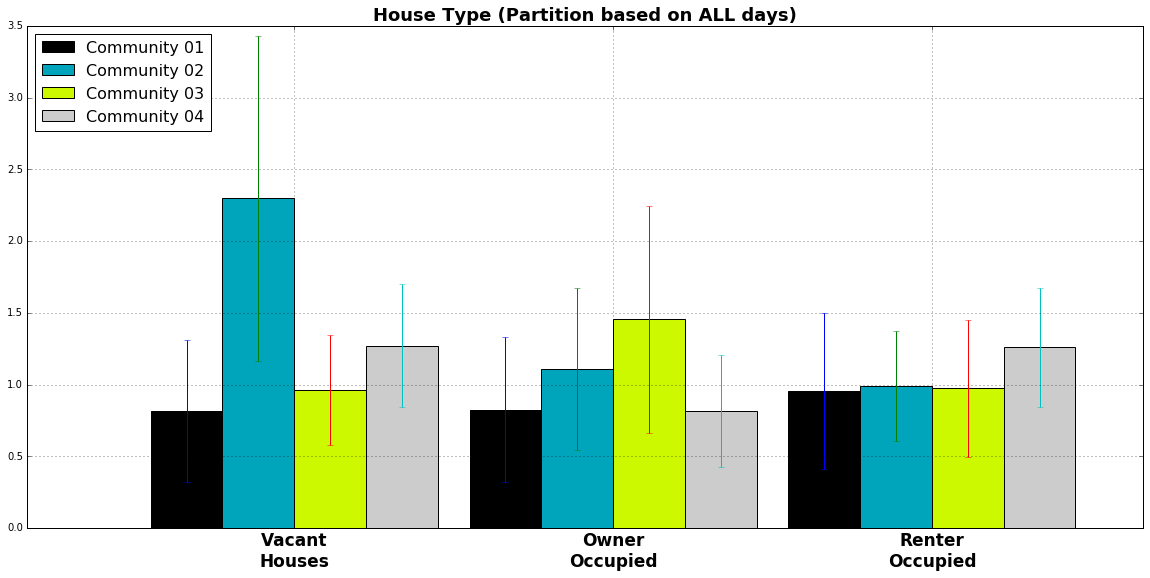

In [16]:
CD.HighlightFeatures(Demo_NY, CD.type_house, P_CP4, CD.legend_housetype,'House Type', by_feature=1)

## Finally, we extract and gather some of those most conspicuous cases and put them together for demonstration

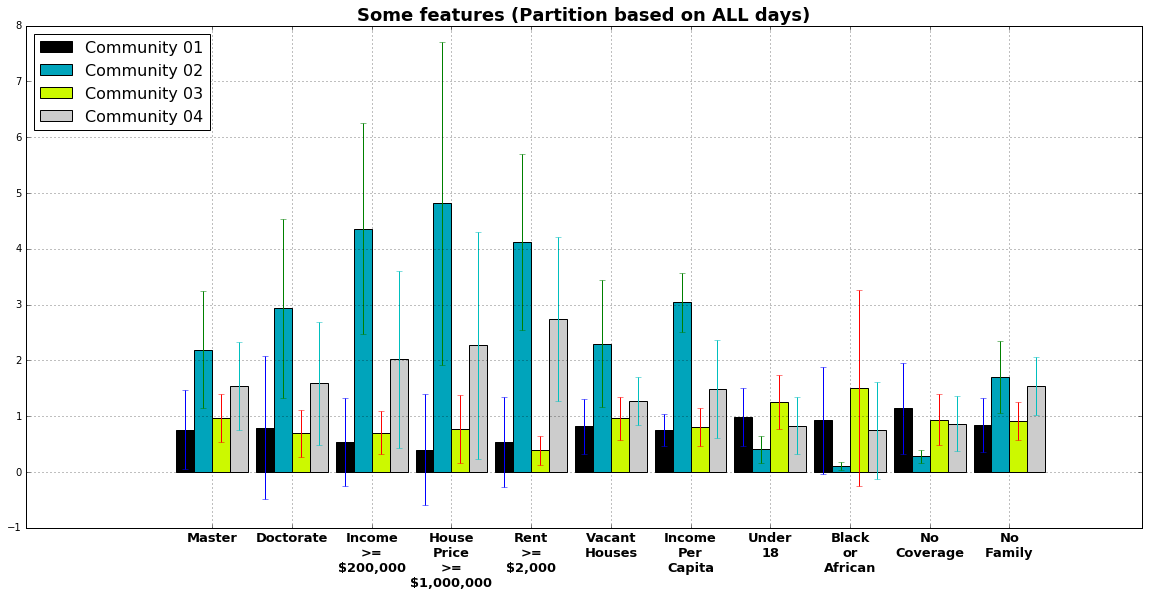

In [17]:
income_per_capita=['SE_T083_001']
selection = CD.education[-3::2] + [CD.income[-1], CD.house_price[-1], CD.rent_price[-1], CD.type_house[0],
                                 income_per_capita[0], CD.population[0], CD.race[1], CD.insurance[0], CD.households[-2]]
legend_selection = CD.legend_edu[-3::2]+[CD.legend_income[-1],CD.legend_house_price[-1], CD.legend_rent_price[-1],
    CD.legend_housetype[0], 'Income Per Capita',CD.legend_pop[0], CD.legend_race[1],CD.legend_insur[0], CD.legend_households[-2]]
CD.HighlightFeatures(Demo_NY, selection, P_CP4, legend_selection, 'Some features', by_feature=1)

## D) Gravitional Test (notes cited from prof. Sobolevsky, NYU CUSP)

In this case nodes are given spatial coordinates, while edges, together with their network topology weight $e(a,b)$, can also be assigned their geographical distance $d(a,b)$. We'll refer to such network as "spatial networks".

It is a common property for many spatial networks to have edge weight decay with distance (connections between more distant objects are weaker). This dependence is often thought as a power-law trend:
$$
e(a,b)\sim d(a,b)^{-\gamma}.
$$

However often nodes are not equal - for example in case of human mobility networks, where nodes are locations in space, while edges represent number of people moving between them, nodes might be of different size or different density. In this case one could also consider
$$
e(a,b)\sim w(a),\ e(a,b)\sim w(b),
$$
or more generally (keeping an idea of the power-law dependence and assuming under-/super-linear scaling of destination attractiveness or origin activity with size): 
$$
e(a,b)\sim w(a)^\alpha,\ e(a,b)\sim w(b)^\beta.
$$
where $w(x)$ is the weight of the node $x$. 

## Gravity model

All together those relations lead to a model
$$
e(a,b)=k\cdot w(a) w(b) d(a,b)^{-\gamma},
$$
or more generally
$$
e(a,b)=k\cdot w(a)^\alpha w(b)^\beta d(a,b)^{-\gamma},
$$
where $k$ is the global proportionality (normalization) factor
$$
k=\frac{\sum\limits_{a,b}e(a,b)}{\sum\limits_{a,b} w(a)^\alpha w(b)^\beta d(a,b)^{-\gamma}}.
$$

In case network does not have loop edges to model, the normalization factor is defined as
$$
k=\frac{\sum\limits_{a\neq b}e(a,b)}{\sum\limits_{a\neq b} w(a)^\alpha w(b)^\beta d(a,b)^{-\gamma}}.
$$

Often it is reasonable to assume that $\alpha=\beta$ (especially if the network is symmetric, like representing number of people visiting both locations $a$ and $b$ regardless their order, or cumulative communication flux between the two locations regardless directionality). 

This model is called gravity model.

## Gravity model with local normalization

Alternatively, one can also introduce local normalization, assuming relative scaling of strength of attractiveness of different destinations $b$ for the origin $a$ to be proportional to
$$
{\rm attr}_a(b)\sim w(b)^\beta d(a,b)^{-\gamma}.
$$
Given the known total outgoing strength $T(a)$ for each node $a$, this leads to the model
$$
e(a,b)=T(a) \frac{{\rm attr}_a(b)}{\sum_c {\rm attr}_a(c)}
$$
i.e.
$$
e(a,b)=T(a) \frac{w(b)^\beta d(a,b)^{-\gamma}}{\sum_c w(c)^\beta d(a,c)^{-\gamma}}.
$$
In case loop edges are missing in the network one should rather write
$$
e(a,b)=T(a) \frac{w(b)^\beta d(a,b)^{-\gamma}}{\sum_{c\neq a} w(c)^\beta d(a,c)^{-\gamma}},
$$
as the entire outgoing strength is to be distributed among the possible non-loop edges for $c\neq a$. 

## Radiation model

Another alternative approach to modelling spatial networks of human mobility and potentially interactions has been suggested in a recent paper [Simini, F., González, M. C., Maritan, A., & Barabási, A. L. (2012). A universal model for mobility and migration patterns. Nature, 484(7392)]. The key idea is that people select a closet destination bettan than the one they have in their location of origin according to a certain attractiveness distribution and the beauty of the model is that it gives a one single paramter-free formula (just based on the given population distribution, nothing to fit or assume unlike the exponents in the gravity model), no matter what the assumed attractiveness distribution was. The model however also relies on the knowledge of the cumulative outgoing strength of the nodes, just like the gravity model with the local normalization does.

The model predicting mobility flux (an edge) $e(a,b)$ between two locations $a,b$ is
$$
e(a,b)=T(a)\frac{p(a)p(b)}{\left(p(a)+s(a,b)\right)\left(p(a)+p(b)+s(a,b)\right)},
$$
where $p(a)$ denotes the population of the location $a$, while $s(a,b)$ is the total population enclosed in the circle centered in $a$ with the radius equal to $d(a,b)$ (i.e. the total population residing no further from $a$ compared to $b$).